In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [9]:
df=pd.read_csv("titanic_toy.csv")

In [10]:
df.head()


,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [11]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [12]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2, test_size=0.2)

In [16]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [17]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()


In [18]:
X_train['Age_Mean']=X_train['Age'].fillna(mean_age)
X_train['Age_Median']=X_train['Age'].fillna(median_age)

X_train['Fare_Mean']=X_train['Fare'].fillna(mean_fare)
X_train['Fare_Median']=X_train['Fare'].fillna(median_fare)



In [19]:
X_train.sample(5)

,Age,Fare,Family,Age_Mean,Age_Median,Fare_Mean,Fare_Median
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
95,NaN,8.0500,0,29.785904,28.75,8.0500,8.0500
525,40.5,7.7500,0,40.500000,40.50,7.7500,7.7500
106,21.0,7.6500,0,21.000000,21.00,7.6500,7.6500
416,34.0,32.5000,2,34.000000,34.00,32.5000,32.5000


In [20]:
print("Original Age = ", X_train['Age'].var())
print("Age_Mean = ", X_train['Age_Mean'].var())
print("Age_Median", X_train['Age_Median'].var())


print("Original Fare = ", X_train['Fare'].var())
print("Fare_Mean = ", X_train['Fare_Mean'].var())
print("Fare_Median", X_train['Fare_Median'].var())


Original Age =  204.34951339046142
Age_Mean =  161.81262452718676
Age_Median 161.98956633460548
Original Fare =  2448.1979137063163
Fare_Mean =  2324.2385256705534
Fare_Median 2340.09102197536


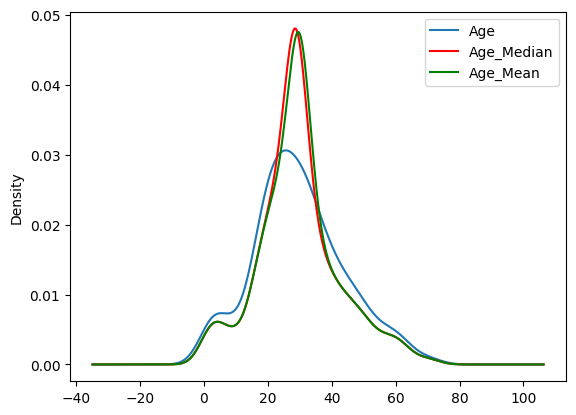

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_Median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_Mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

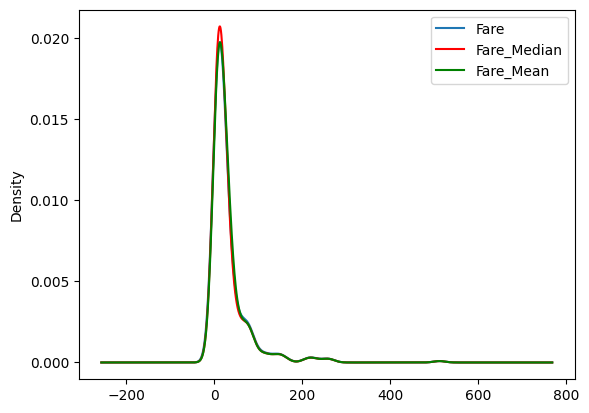

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_Median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_Mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [23]:
X_train.cov()

,Age,Fare,Family,Age_Mean,Age_Median,Fare_Mean,Fare_Median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_Mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_Median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_Mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_Median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [24]:
X_train.corr()

,Age,Fare,Family,Age_Mean,Age_Median,Fare_Mean,Fare_Median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_Mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_Median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_Mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_Median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<Axes: >

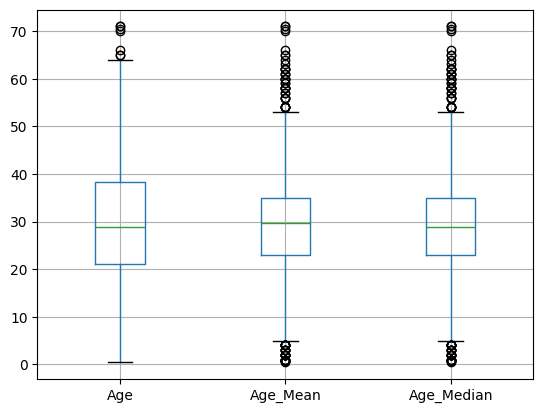

In [ ]:
X_train[['Age', 'Age_Mean', 'Age_Median']].boxplot()

## after replacing the nan values with mean and median then the actual data that is not outlier seems to be outlier That is not good
## by replacing mean and median 

<Axes: >

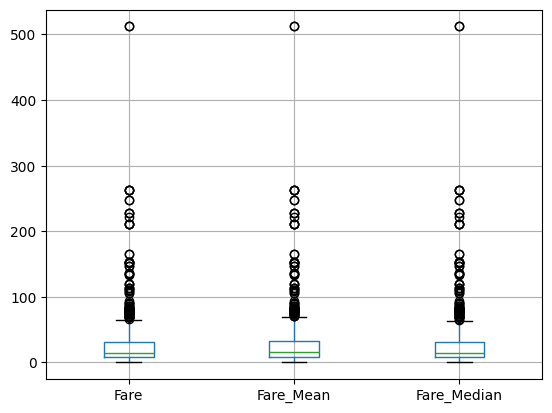

In [26]:
X_train[['Fare', 'Fare_Mean', 'Fare_Median']].boxplot()


In [27]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=2, test_size=0.2)

# Using Sklearn

In [28]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [29]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [30]:
trf.fit(X_train)

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('imputer1', ...), ('imputer2', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``featu

In [31]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [32]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [33]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [34]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]], shape=(712, 3))